# Step 0 : Upload Data Files

In [1]:
#Install packages
!pip install numpy
!pip install pandas
!pip install sklearn
!pip install bs4
!pip install feedparser
!pip install lxml
!pip install --upgrade pip
!pip install unidecode
!pip install nltk


Requirement already up-to-date: pip in /anaconda3/lib/python3.6/site-packages (18.1)


In [2]:
#Import basic libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import re 
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
from bs4 import BeautifulSoup
from unidecode import unidecode
from nltk.stem import PorterStemmer
stemmer =PorterStemmer()

import nltk

nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /Users/TammiHawa
[nltk_data]     1/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
#Importing the Dataset #2 into a dataframe to organize data
df_US_airline_tweets=pd.read_csv('US_airline_tweets.csv')

#check initial entries
df_US_airline_tweets.head()

,id,sentiment,negative_reason,user,retweet_count,text
0,5.703010e+17,positive,NaN,jnardino,0,@VirginAmerica plus you've added commercials t...
1,5.703010e+17,negative,Bad Flight,jnardino,0,@VirginAmerica it's really aggressive to blast...
2,5.703010e+17,negative,Can't Tell,jnardino,0,@VirginAmerica and it's a really big bad thing...
3,5.703010e+17,negative,Can't Tell,jnardino,0,@VirginAmerica seriously would pay $30 a fligh...
4,5.703010e+17,positive,NaN,cjmcginnis,0,"@VirginAmerica yes, nearly every time I fly VX..."


In [4]:
#Importing the Dataset #1 into dataframe to organize data
df_generic_tweets= pd.read_csv('generic_tweets.txt')

#check initial entries 
df_generic_tweets.head()

,class,id,date,query,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


# Step 1: Data PreProcessing

In [5]:
#Start with df_generic_tweets()

stop = stopwords.words('english')

df_generic_tweets.text= df_generic_tweets.text.apply(str)

#remove only the html tags
df_generic_tweets['text']= df_generic_tweets['text'].apply( lambda x: BeautifulSoup(x,'lxml').get_text())

#convert to ascii characters
df_generic_tweets['text']=df_generic_tweets['text'].apply(lambda x: unidecode(x)) 

#remove urls
df_generic_tweets['text'].apply(str)
df_generic_tweets['text']=df_generic_tweets['text'].apply(lambda x: re.sub(r'http\S+', '', x))

#turn characters to lowercase
df_generic_tweets['text']=df_generic_tweets['text'].apply(lambda x: x.casefold())

#remove stopwords
df_generic_tweets['text'] = df_generic_tweets['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))


#remove twitter handles
df_generic_tweets['text'].apply(str)
df_generic_tweets['text']=df_generic_tweets['text'].apply(lambda x: re.sub(r'@\S+', '', x))

#remove punctuation
df_generic_tweets['text'] = df_generic_tweets['text'].apply(lambda x: re.sub('[^a-zA-Z]' ,' ' , x))

df_generic_tweets['text']

0            awww  that s bummer  shoulda got david carr...
1         upset can t update facebook texting it    migh...
2          dived many times ball  managed save     rest ...
3                          whole body feels itchy like fire
4          no  behaving all  i m mad  here  can t see th...
5                                                whole crew
6                                                  need hug
7          hey long time see  yes   rains bit  only bit ...
8                                                      nope
9                                               que muera  
10                       spring break plain city    snowing
11                                          re pierced ears
12         bear watch it  thought ua loss embarrassing  ...
13                   counts  idk either  never talk anymore
14         would ve first  gun  really though  zac snyde...
15                    wish got watch you   miss  premiere  
16        hollis  death scene hurt sever

In [6]:
#Continue with df_US_airline_tweets

df_US_airline_tweets.text= df_US_airline_tweets.text.apply(str)

#remove only the html tags
df_US_airline_tweets['text']= df_US_airline_tweets['text'].apply( lambda x: BeautifulSoup(x,'lxml').get_text())

#ascii characters
df_US_airline_tweets['text']=df_US_airline_tweets['text'].apply(lambda x: unidecode(x)) 

#remove urls
df_US_airline_tweets['text'].apply(str)
df_US_airline_tweets['text']=df_US_airline_tweets['text'].apply(lambda x: re.sub(r'http\S+', '', x))

#turn characters to lowercase
df_US_airline_tweets['text']=df_US_airline_tweets['text'].apply(lambda x: x.casefold())

#remove stopwords
df_US_airline_tweets['text'] = df_US_airline_tweets['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))


#do not remove twitter handles so that we can identify airlines

#remove punctuation
punctuation_exclude = '''!()-[]{};:'"\,<>./?$%^&*_~'''
df_US_airline_tweets['text'] = df_US_airline_tweets['text'].apply(lambda x:''.join([i for i in x if i not in punctuation_exclude]))



df_US_airline_tweets['text']

0        @virginamerica plus added commercials experien...
1        @virginamerica really aggressive blast obnoxio...
2                      @virginamerica really big bad thing
3        @virginamerica seriously would pay 30 flight s...
4        @virginamerica yes nearly every time fly vx ae...
5                   @virginamerica well didntaeur|but do d
6        @virginamerica amazing arrived hour early good me
7        @virginamerica 3 pretty graphics much better m...
8        @virginamerica great deal already thinking 2nd...
9        @virginamerica @virginmedia im flying #fabulou...
10                                   @virginamerica thanks
11                @virginamerica sfopdx schedule still mia
12       @virginamerica excited first cross country fli...
13       @virginamerica flew nyc sfo last week fully si...
14                          ai flying @virginamerica aoidy
15       @virginamerica know would amazingly awesome bo...
16       @virginamerica first fares may three times car.

# Step 2: Exploratory Analysis


Part a) Propose and implement a simple procedure to determine the airline of a given tweet

Procedure description:
1) Identify all the words attached to a '@' for each tweet. These are words that are being tagged on twitter
2) Put all the identified words into another column, corresponding to the tweet.
3) Determine a set of words that are airlines
    -Do this based on frequency of words identified
4) Match the identified word for each tweet to the set of words considered to be airlines
    -If a tweet does not match, consider removing it




In [7]:
#identify the @ tags
df_US_tweets_analysis= df_US_airline_tweets[['id','sentiment','negative_reason', 'text']]
df_US_tweets_analysis['tagged_airline'] =  df_US_tweets_analysis['text'].str.findall(r'@.*?(?=\s|$)')

#identify the number of tags in each tweet
df_US_tweets_analysis['num_tags'] = df_US_tweets_analysis['tagged_airline'].apply(lambda x: len(x))

#get sample of table
df_US_tweets_analysis.head()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,id,sentiment,negative_reason,text,tagged_airline,num_tags
0,5.703010e+17,positive,NaN,@virginamerica plus added commercials experien...,[@virginamerica],1
1,5.703010e+17,negative,Bad Flight,@virginamerica really aggressive blast obnoxio...,[@virginamerica],1
2,5.703010e+17,negative,Can't Tell,@virginamerica really big bad thing,[@virginamerica],1
3,5.703010e+17,negative,Can't Tell,@virginamerica seriously would pay 30 flight s...,[@virginamerica],1
4,5.703010e+17,positive,NaN,@virginamerica yes nearly every time fly vx ae...,[@virginamerica],1


In [35]:
#Analyze df_US_tweets_analysis to determine frequency
df_US_tweets_analysis[df_US_tweets_analysis['num_tags'] == 1].groupby(df_US_tweets_analysis['tagged_airline'].astype(str)).count()


,id,sentiment,negative_reason,text,tagged_airline,num_tags,airline_identified
tagged_airline,,,,,,,
@americanair,2023,2023,1724,2023,2023,2023,2023
@americanairif,1,1,1,1,1,1,1
@americanairstill,2,2,2,2,2,2,2
@deltaassist,2,2,2,2,2,2,2
@jetblue,1344,1344,876,1344,1344,1344,1344
@jetblues,4,4,1,4,4,4,4
@ninadavuluri,1,1,0,1,1,1,1
@southwestair,1565,1565,1082,1565,1565,1565,1565
@southwestair#4569,1,1,1,1,1,1,1


The assumption is made that a tweet is allocated to an airline if the tweet identifies the airline with an '@' tag. This list above identifies that @americanair, @jetblue, @southwestair, @united, @usairways, and @virginamerica are the airlines to be identified. Even though other airlines, such as delta, are mentioned, will not include them because so few mentions are present. Also, will not sort the tags that are variations of the airliens into their respective airlines. Will just abandon them, because they represent so few in volume compared to the total number of tweets.  


In [9]:
#create a set of airline tags to search for

tagList=df_US_tweets_analysis['tagged_airline'].tolist()

tagList

s= []
for i in tagList:
    if i not in s:
        s.append(i)
        
s
s.sort(key=len)
s
s[:25]
t=s[:20]
t.remove(['@unitedrebooked'])
t.remove(['@unitedlies'])
t.remove(['@unitedexcited'])
t.remove(['@southwestair#4569'])
t.remove(['@ninadavuluri'])
t.remove(['@southwestair#swadiversity'])
t.remove(['@unitedthats'])
t.remove(['@unitedaeur'])
t.remove(['@uniteds'])
t.remove(['@southwestairs'])
t.remove(['@jetblues'])
t.remove(['@americanairstill'])
t.remove(['@americanairif'])
t.remove(['@deltaassist'])
t2 = [item for sublist in t for item in sublist]

#set of airlines identified
airline_set = set(t2)

#remove the [,],' characters in each tagged airline so match can be made.

df_US_tweets_analysis['tagged_airline'] = df_US_tweets_analysis['tagged_airline'].apply(lambda x: re.sub(r'\[',"",str(x)))
df_US_tweets_analysis['tagged_airline'] = df_US_tweets_analysis['tagged_airline'].apply(lambda x: re.sub(r'\]',"",str(x)))
df_US_tweets_analysis['tagged_airline'] = df_US_tweets_analysis['tagged_airline'].apply(lambda x: re.sub(r'\'',"",str(x)))


In [10]:
#create a funcion to match the tags in each tweet to the set of airlines.

import fnmatch
patterns = [re.compile(fnmatch.translate(p)) for p in airline_set]

def inAirline(x):
    for word in x.split(','):
        for pattern in patterns:
            if pattern.match(word):
                return word
    else: 
        return "none"
            


In [11]:
#match the airline to the set

df_US_tweets_analysis['airline_identified'] = df_US_tweets_analysis['tagged_airline'].apply(lambda x: inAirline(str(x)))

df_US_tweets_analysis.head()

,id,sentiment,negative_reason,text,tagged_airline,num_tags,airline_identified
0,5.703010e+17,positive,NaN,@virginamerica plus added commercials experien...,@virginamerica,1,@virginamerica
1,5.703010e+17,negative,Bad Flight,@virginamerica really aggressive blast obnoxio...,@virginamerica,1,@virginamerica
2,5.703010e+17,negative,Can't Tell,@virginamerica really big bad thing,@virginamerica,1,@virginamerica
3,5.703010e+17,negative,Can't Tell,@virginamerica seriously would pay 30 flight s...,@virginamerica,1,@virginamerica
4,5.703010e+17,positive,NaN,@virginamerica yes nearly every time fly vx ae...,@virginamerica,1,@virginamerica


In [12]:
#determine if any rows should be removed
df_US_tweets_analysis.groupby('airline_identified').size()

airline_identified
@americanair      2289
@jetblue          1489
@southwestair     1751
@united           3114
@usairways        2525
@virginamerica     333
none                40
dtype: int64

In [13]:
#becase 'none' represents 0.346% of the data, remove rows where none is indicated
df_US_tweets_cut = df_US_tweets_analysis[['id', 'sentiment', 'negative_reason','text','tagged_airline','num_tags','airline_identified']]
df_US_tweets_cut = df_US_tweets_cut[df_US_tweets_cut.airline_identified != "none"]
df_US_tweets_cut.groupby('airline_identified').size()

#Remove '@' symbol
df_US_tweets_cut['airline_identified']=df_US_tweets_cut['airline_identified'].apply(lambda x: re.sub('@', '', x))
df_US_tweets_summary = pd.DataFrame(data = df_US_tweets_cut.groupby('airline_identified').size(), columns = ['counted'])

#produce summary table
df_US_tweets_summary
df_US_tweets_summary['percentage_repn'] = df_US_tweets_summary['counted'].apply(lambda x: x/ df_US_tweets_summary['counted'].sum())
df_US_tweets_summary.sort_values('percentage_repn', ascending = False)
df_US_tweets_summary['airline_identified'] = df_US_tweets_summary.index

df_US_tweets_summary

,counted,percentage_repn,airline_identified
airline_identified,,,
americanair,2289,0.199026,americanair
jetblue,1489,0.129467,jetblue
southwestair,1751,0.152248,southwestair
united,3114,0.270759,united
usairways,2525,0.219546,usairways
virginamerica,333,0.028954,virginamerica


According to the summary table above, the distribution of the US arilines of the tweets is not uniform. 
Virgin America is the least represented airline, while United is the most represented, followed by US Airways, 
American Air and the JetBlue. 

Text(0.5,0,'Airline')

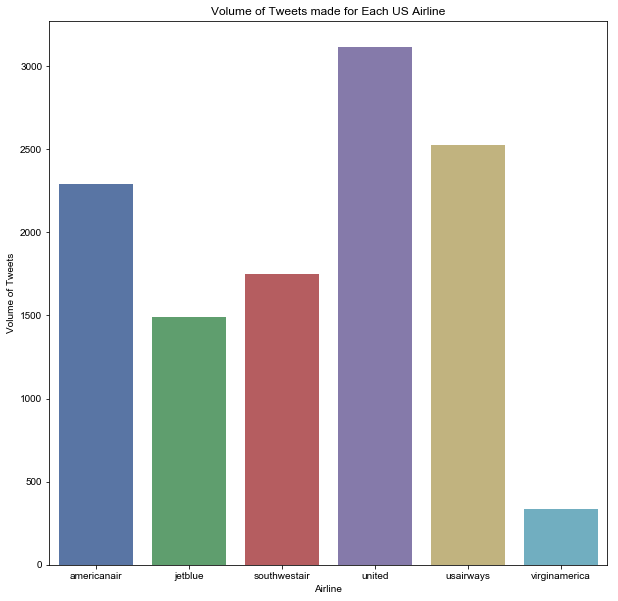

In [14]:

'''
Part b) Graphical figure  that visualizes some aspect og the generic tweets 
and another figure from the US airline tweets.

'''

#Start with plot for US Airline Tweets.
f, ax = plt.subplots(figsize=(10,10))
sns.set()
sns.set_style("whitegrid")
sns.set_style("ticks",{"xtick.major.size":8,"ytick.major.size":8})
sns.axes_style("whitegrid")

graph_1 = sns.barplot(x="airline_identified", y="counted", data = df_US_tweets_summary)
plt.title("Volume of Tweets made for Each US Airline")
plt.ylabel("Volume of Tweets")
plt.xlabel("Airline")


The Volume of Tweets Made for Each US Airline graph depicts what we saw in the above analysis - that 
VirginAmerica has a significantly lower volume of tweets than the other airlines.

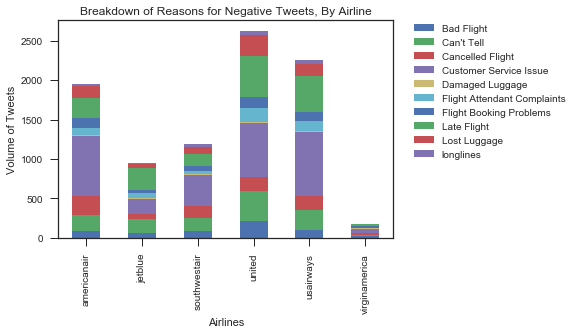

In [15]:
#BONUS
#Add another figure which visualizes the reason for negative of the US Airline data, by airline

from matplotlib.pyplot import figure
#f, ax = plt.subplots(figsize=(10,10))

#df_US_tweets_cut.head()
#df_US_tweets_cut.groupby(['airline_identified','negative_reason']).size()



df_US_tweets_cut2 = df_US_tweets_cut.groupby(['airline_identified','negative_reason'])['airline_identified'].count().unstack('negative_reason').fillna(0)
ax = df_US_tweets_cut2[['Bad Flight', "Can't Tell", 'Cancelled Flight', 'Customer Service Issue', 'Damaged Luggage', 'Flight Attendant Complaints', 'Flight Booking Problems', 'Late Flight', 'Lost Luggage', 'longlines']].plot(kind='bar', stacked=True)
ax.set_xlabel("Airlines")
ax.set_ylabel("Volume of Tweets")
#plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
 #          ncol=2, mode="expand", borderaxespad=0.)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.title.set_text("Breakdown of Reasons for Negative Tweets, By Airline")

plt.show()



The distribution of reasons for negative tweets by each airline is shown in the baove graph.
This graph shows that many of the tweets were attributed to Customer Service Issues for all airlines, as well as are unable to categorize. Additionally, Lost luggage seemed to be a reason for negative tweets for all airlines.

Text(0.5,0,'Polarity (0 is negative, 4 is positive)')

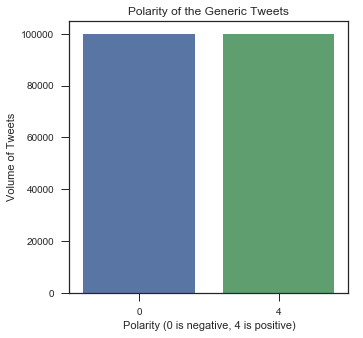

In [16]:
#Plot for Generic Tweets

df_generic_tweets_summary = pd.DataFrame(data=df_generic_tweets.groupby('class').size())

#Start with plot for US Airlines.
f, ax = plt.subplots(figsize=(5,5))
sns.set()
sns.set_style("whitegrid")
sns.set_style("ticks",{"xtick.major.size":8,"ytick.major.size":8})
sns.axes_style("whitegrid")

#df_generic_tweets_summary['priority']=df_generic_tweets_summary.index
df_generic_tweets_summary['polarity']=df_generic_tweets_summary.index

df_generic_tweets_summary.columns = ['volume', 'polarity']
df_generic_tweets_summary

graph_2 = sns.barplot(x="polarity", y="volume", data = df_generic_tweets_summary)
plt.title("Polarity of the Generic Tweets")
plt.ylabel("Volume of Tweets")
plt.xlabel("Polarity (0 is negative, 4 is positive)")


As is evident from the Polarity of the General Tweets plot, there is an equal distribution of tweets that have a positive sentiment ans there are tweets that have a negative sentiment.

This is important to verify because it will affedct how the regression models will be trained.
This minimizes the bias in the training data.


# Step 3: Model Preparation


For this section, the following will be done to prepare the Generic Tweets for Logistic Regression:

1) Create a function to preprocess the tweets to tokenize each tweet
2) Use a count vectorizer and initialize it using our own analyser, which will be the preprocessor
3) Create a bag of words
4) Import the inverse document frequency transformer
5) Split the data into test set and train set



In [17]:
#Step 1) create a function to preproces the tweets to tokenize each tweet

def preprocessor(text):
    b = [word for word in text.split()]
    c = [stemmer.stem(word) for word in b]
    return c

In [18]:
#Step 2) Download the count vectorizer

from sklearn.feature_extraction.text import CountVectorizer

#Step 3) vreate a bag of words and initialize the count vectorizer
cv = CountVectorizer(analyzer=preprocessor)
bag_of_words = cv.fit(df_generic_tweets['text'])

#check the length of vocabulary
print("the vocabulary size is",len(bag_of_words.vocabulary_))

bag_of_words = cv.transform(df_generic_tweets['text'])

'''
Step 4: Import the inverse document frequency transformer
TF-IDF will remove the weight from frequent words (like is , the, if any present after removing the stop words..) by 
doing count(word) / #total words. It will also reduce the weight even more by doing the term frequecny * inverse docuemnt frequency.

'''
from sklearn.feature_extraction.text import TfidfTransformer

d = TfidfTransformer().fit(bag_of_words)
e = d.transform(bag_of_words) 

e.shape

#Step 5) Split the data into test set and training set
from sklearn.model_selection import train_test_split

#split the test data and train data (70% train and 30% test), include a random state so the results are consistent throughout various runs of the model
X = e
y = df_generic_tweets['class']
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


the vocabulary size is 59998


# Step 4: Model Implementation

For the model implementation of both logistic regression models:

1) Train a logistic regression model on the training data and apply it to the test data, as prepared in 
the above section
    -obtain an accuracy value and the confusion matrix

2) Apply the logistic regression model to the US Airline data.
- Convert the sentiment column in the US airline data to the 
- Compare the models predictions to each tweets sentiment label
- Use a confusion matrix to compare results

3) Split the negative US Airline tweets into a test and train set
- Group some of the reasons for a negative tweet into groups based on similarity of reason
- Train a multi class logistic regression model to predict the reason for the negative tweets
    - one input will be word frequency analysis (bag of words aproach)    
- Test the multi class logistic regression model
   

In [19]:
#Step 1) Train a logistic regression model on the training data and apply to the test data
from sklearn.linear_model import LogisticRegression

log = LogisticRegression()

#fit the model
log.fit(X_train, y_train)

#use the model
y_pred = log.predict(x_test)

#understand the performance of the model:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

from sklearn.metrics import accuracy_score
print("the accuracy score for the logistic regression model is", round(accuracy_score(y_test, y_pred),3))


[[22331  7520]
 [ 6379 23770]]
the accuracy score for the logistic regression model is 0.768


**Interpretation of initial model results:**

From the confusion matrix, it is evident that the model:

-correctly predicted 22,331 positive tweetss and 23,770 negative tweets

-falsley characterized 6,379 tweets as positive but in reality they were negative

-falsely characterized 7,520 tweets as negative when in reality they were positive

This can be summed by the accuracy score, which shows that 76% of the time the model performed accurately.


In [20]:
#Step 2) Apply the logistic regression model to the US airline tweets data

#First, make a 'class' column in the US Airline data where sentiment of positive = 4 and negative = 0:
#this will match the coded sentiment of the trainng set data.

def to_class(x):
    if x == "positive":
        return 4
    else:
        return 0

df_US_tweets_cut['class'] = df_US_tweets_cut['sentiment'].apply(lambda x: to_class(x))   

df_US_tweets_cut.head()


,id,sentiment,negative_reason,text,tagged_airline,num_tags,airline_identified,class
0,5.703010e+17,positive,NaN,@virginamerica plus added commercials experien...,@virginamerica,1,virginamerica,4
1,5.703010e+17,negative,Bad Flight,@virginamerica really aggressive blast obnoxio...,@virginamerica,1,virginamerica,0
2,5.703010e+17,negative,Can't Tell,@virginamerica really big bad thing,@virginamerica,1,virginamerica,0
3,5.703010e+17,negative,Can't Tell,@virginamerica seriously would pay 30 flight s...,@virginamerica,1,virginamerica,0
4,5.703010e+17,positive,NaN,@virginamerica yes nearly every time fly vx ae...,@virginamerica,1,virginamerica,4


In [21]:

#Create a bag of words for US tweets, then run analysis:
cv1 = CountVectorizer(analyzer=preprocessor)

#use the bag of words form the Generic Tweets data set
bag_of_words1 = cv1.fit(df_generic_tweets['text'])

#check the length of vocabulary
len(bag_of_words1.vocabulary_)

bag_of_words1 = cv1.transform(df_US_tweets_cut['text'])

d1 = TfidfTransformer().fit(bag_of_words1)
e1 = d1.transform(bag_of_words1)

print("The shape is",e1.shape)

#split the test data and train data (70% train and 30% test)
X1 = e1
y1 = df_US_tweets_cut['class']

#make predicions for the sentiment of the US Airline tweets
y1_pred = log.predict(X1)

print("The confusion marix is")
print(confusion_matrix(y1,y1_pred))

print("The accuracy score for using the logistic regression model on the US tweets is", round(accuracy_score(y1, y1_pred),3))

The shape is (11501, 59998)
The confusion marix is
[[6323 2825]
 [ 308 2045]]
The accuracy score for using the logistic regression model on the US tweets is 0.728


In [22]:
'''
Step 3: Split the negative US Airline tweets into test and train, consider combining reasons for negative tweet based on 
similar reasoning

Assumption: Use the tweets that have a ground truth of being negative, not the prediction. 

'''

print(df_US_tweets_cut.groupby('negative_reason').size())

#create a data frame with only the negative tweets
df_US_Tweets_neg = df_US_tweets_cut[['negative_reason', 'text','airline_identified','class']]
df_US_Tweets_neg = df_US_Tweets_neg[df_US_Tweets_neg['class']==0]
df_US_Tweets_neg.head()

negative_reason
Bad Flight                      579
Can't Tell                     1183
Cancelled Flight                845
Customer Service Issue         2899
Damaged Luggage                  74
Flight Attendant Complaints     481
Flight Booking Problems         528
Late Flight                    1661
Lost Luggage                    722
longlines                       176
dtype: int64


,negative_reason,text,airline_identified,class
1,Bad Flight,@virginamerica really aggressive blast obnoxio...,virginamerica,0
2,Can't Tell,@virginamerica really big bad thing,virginamerica,0
3,Can't Tell,@virginamerica seriously would pay 30 flight s...,virginamerica,0
11,Late Flight,@virginamerica sfopdx schedule still mia,virginamerica,0
13,Bad Flight,@virginamerica flew nyc sfo last week fully si...,virginamerica,0


In [23]:
#create a function to group the reasons for negative sentiment together, to narrow the number of outputs
'''
Aim to group reasons for negative tweets with low volumes of tweets attributed to reasons with high volumes, and also based
on reason for tweet.

New groups:
0 = longlines 
1 = can't tell 
2 = dammaged luggage and lost luggage -> group tweets related to luggage
3 = bad flight, cancelled flight, and late flight -> group tweets realted to flight 
4 = customer service issue, flight attendant complaints, flight booking problems -> group tweets that related
to customer service

'''

def neg_groups(x):
    if str(x) == "longlines":
        return 0
    if str(x) == "Can't Tell":
        return 1
    if str(x) == "Damaged Luggage" or str(x) == "Lost Luggage":
        return 2
    if str(x) == "Bad Flight" or str(x) == "Cancelled Flight" or str(x) == "Late Flight":
        return 3
    else:
        return 4
    
df_US_Tweets_neg['class_2'] = df_US_Tweets_neg['negative_reason'].apply(lambda x: neg_groups(x)) 
df_US_Tweets_neg.head()

,negative_reason,text,airline_identified,class,class_2
1,Bad Flight,@virginamerica really aggressive blast obnoxio...,virginamerica,0,3
2,Can't Tell,@virginamerica really big bad thing,virginamerica,0,1
3,Can't Tell,@virginamerica seriously would pay 30 flight s...,virginamerica,0,1
11,Late Flight,@virginamerica sfopdx schedule still mia,virginamerica,0,3
13,Bad Flight,@virginamerica flew nyc sfo last week fully si...,virginamerica,0,3


In [24]:
#Create a bag of words for negative US Airline tweets, then run milti-class logistic regression:
cv2 = CountVectorizer(analyzer=preprocessor)

#use the bag of words form the Generic Tweets data set
bag_of_words2 = cv2.fit(df_US_Tweets_neg['text'])

#check the length of vocabulary
print("The bag of words contains", len(bag_of_words2.vocabulary_), "words")

bag_of_words2 = cv2.transform(df_US_Tweets_neg['text'])


d2 = TfidfTransformer().fit(bag_of_words2)
e2 = d2.transform(bag_of_words2)

e2.shape

print("the shape is",e2.shape)

#split the test data and train data (70% train and 30% test), include a random state to ensure results are consistent throughout various runs of the model
X2 = e2
y2 = df_US_Tweets_neg['class_2']
X2_train, x2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=42)


log2 = LogisticRegression()
log2.fit(X2_train, y2_train)

#make predicions for the sentiment of the US Airline tweets
y2_pred = log2.predict(x2_test)

print(confusion_matrix(y2_test,y2_pred))

print("the accuracy score for using the logistic regression model on the US tweets is", round(accuracy_score(y2_test, y2_pred),3))



The bag of words contains 9861 words
the shape is (9148, 9861)
[[  0   1   5  21  26]
 [  0  72   5  68 228]
 [  0   5 150  28  75]
 [  0  17   8 733 172]
 [  0  13  15 140 963]]
the accuracy score for using the logistic regression model on the US tweets is 0.699


# Step 5: Discussion 

# Model 1 Discussion: Logistic Regression To Predict Sentiment of US Airline Tweets

In this discussion of the results of model 1, **the results will be discussed as if the ground truths for each tweet were not given.** 

**Discussion and Interpretation of results when applying the logistic regression model to the US Airline Tweets:**

From the confusion matrix, it is evident that the model:

-correctly predicted 6,323 positive tweets and 2,045 negative tweets

-falsley characterized 308 tweets as positive but in reality they were negative

-falsely characterized 2,825 tweets as negative when in reality they were positive

This can be summed by the accuracy score, which shows that 73% of the time the model performed accurately.

This could imply that using the words from the generic tweets to predict the sentiment of the US airline tweets skews the results. Most of the falsely characterized tweets may include language that is deemed negative in the bag of words, but is not used in a negative way in the context in which it is used. Another potential reason is that the US airline tweets may have words that are not included in the generic tweet bag of words, and so are not captured in the model.

**How is each airline viewed in the public eye?**
The results of the logistic regression model will be refered to in order to answer this question. This model was built using the bag of words method, where the frequency of each word in each tweet was analyzed, and based on the frequency of words in a given tweet, the sentiment was classified based on training data. The training data was tweets from the generic tweet data set, and the sentiment of each general tweet was provided. The general tweets were not related to US Airlines. From the results of this analysis, it is evident that the senitment for each airline is:


In [25]:
#summarize results for each airline from model 1
results_model1 = pd.DataFrame({
    'true':y1,
    'predicted': y1_pred
})

#define a funciton to clearly add sentiment to analysis rahter than 0 and 4
def sentiment(x):
    if x==0: 
        return "negative" 
    else: 
        return "positive"
#continue adding information to the results summary
results_model1['row_index']=results_model1.index
results_model1['text'] = results_model1['row_index'].apply(lambda x: df_US_tweets_cut['text'][int(x)])
results_model1['airline']= results_model1['row_index'].apply(lambda x: df_US_tweets_cut['airline_identified'][int(x)])
results_model1['sentiment'] = results_model1['predicted'].apply(lambda x:sentiment(x))

results_model1.head()

results_model12=results_model1.groupby(['airline','predicted']).count()
results_model12['predicted2']=[0,4,0,4,0,4,0,4,0,4,0,4]
results_model12['airline2'] = ['americanair','americanair','jetblue','jetblue','southwestair','southwestair','united','united','usairways','usairways','virginamerica','virginamerica']
results_model12['sentiment2'] = results_model12['predicted2'].apply(lambda x:sentiment(x))

results_model122= pd.DataFrame(data = results_model12[['airline2','sentiment2','predicted2','true']])
results_model122['volume_of_tweets']=results_model122['true']

results_model122.drop(columns=['true','airline2','predicted2'])

sentiment2  volume_of_tweets
airline       predicted                             
americanair   0           negative              1404
              4           positive               885
jetblue       0           negative               690
              4           positive               799
southwestair  0           negative               903
              4           positive               848
united        0           negative              1861
              4           positive              1253
usairways     0           negative              1626
              4           positive               899
virginamerica 0           negative               147
              4           positive               186

In [26]:
#show percentage of tweets that were positive for each airline

USAirline_tweets_Sentiment = pd.DataFrame(columns=['airline', 'negative_tweets', 'positive_tweets'],
                                         data = [['americanair', 0.62,0.38], ['jetblue', 0.45, 0.55], 
                                                 ['southwestair',0.51,0.49],['united',0.58,0.42], 
                                                 ['usairways', 0.65, 0.35], ['virginamerica',0.42,0.58]])
USAirline_tweets_Sentiment

,airline,negative_tweets,positive_tweets
0,americanair,0.62,0.38
1,jetblue,0.45,0.55
2,southwestair,0.51,0.49
3,united,0.58,0.42
4,usairways,0.65,0.35
5,virginamerica,0.42,0.58


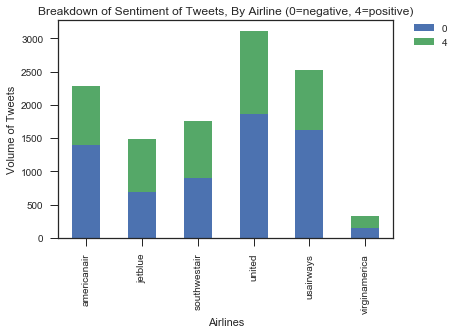

In [27]:
#BONUS
#Add another figure which visualizes the predicted sentiment of the US Airline data, by airline
from matplotlib.pyplot import figure

df_US_tweets_results2 = results_model1.groupby(['airline','predicted'])['airline'].count().unstack('predicted').fillna(0)
ax = df_US_tweets_results2[[0, 4]].plot(kind='bar', stacked=True)
ax.set_xlabel("Airlines")
ax.set_ylabel("Volume of Tweets")

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.title.set_text("Breakdown of Sentiment of Tweets, By Airline (0=negative, 4=positive)")

#df_US_tweets_results2
plt.show()


As is evident from both the summary tables as well as the bar graph, some airlines are viewed more negatively than positively. The most negatively viewed airline is US Airways with 65% of the sentiment of tweets they are mentioned in being negative, while American Air trails with 62% and United with 58% of tweets being negative in sentiment. At the same time, Virgin America has 58% of their tweets with positive sentiment, and Jet Blue with 55% of the tweets they are mentioned in have positive sentiment. Public opinion, derived from the classified sentiment of the tweets, is split for Southwest Air with51% of tweets being negative. However, it is hard to draw strong conclusions about the public opinion of Virgin America because it has such a low volume of tweets. Additionaly, conclusions are drawn about public opinion of each US airline from the tweets they are mentioned in on the assumption that the people who tweet about US airlines are representative of the public. However, it is unknow who is tweeting about each airline: are they from a particular demographic, what is their income, how frequently do they fly? These are questions that, if answered would allow for better understanding of if public opinion of each airline can indeed be inferred from the tweets they are mentioned in.

**Ways to improve the accuracy of the model:**
Train the model with more words that have a postive sentient. From the confusion matrix, we can see that most of the tweets that were mis-classified were in reality positive, yet were characterized as negative. This could indicate that the words were misclassified because they were consdiered to be negative in the training data set. Also consdier groups of words  - when words are used together in one sentence, they may be positive, but in another they may be negative.


# Model 2 Discussion: Multi Class Logistic Regression to Classify Reason for Negative Tweets

In this section of the discussion, further analysis will be done to answer the research question by understanding reasons why the US Airlines may have a negative sentiment in the pubilc opinion. From the above discussion above, it has been established that US Airlines, American Air, as well as United are the airlines with fairly negative public sentiment. The performance of the logistic regression model will be analyzed, and try to propose ways it could be improved. 

First, the reasons why each airline has a negative sentiment will be analyzed. The predicted results will be analyzed as if the ground truths were not available. For this logistic regression model, the reasons for negative sentiment were grouped as follows:

**Groups**

0 = longlines 

1 = can't tell 

2 = dammaged luggage and lost luggage -> group tweets related to luggage

3 = bad flight, cancelled flight, and late flight -> group tweets realted to flight 

4 = customer service issue, flight attendant complaints, flight booking problems -> group tweets that related
to customer service

In [28]:
#Add results to a dataframe to examine which were correct and which were not
results_model2 = pd.DataFrame({
    'true':y2_test,
    'predicted': y2_pred
})

results_model2['row_index']=results_model2.index
results_model2['text'] = results_model2['row_index'].apply(lambda x: df_US_Tweets_neg['text'][int(x)])
results_model2['airline']= results_model2['row_index'].apply(lambda x: df_US_Tweets_neg['airline_identified'][int(x)])
results_model2['negative_reason']= results_model2['row_index'].apply(lambda x: df_US_Tweets_neg['negative_reason'][int(x)])


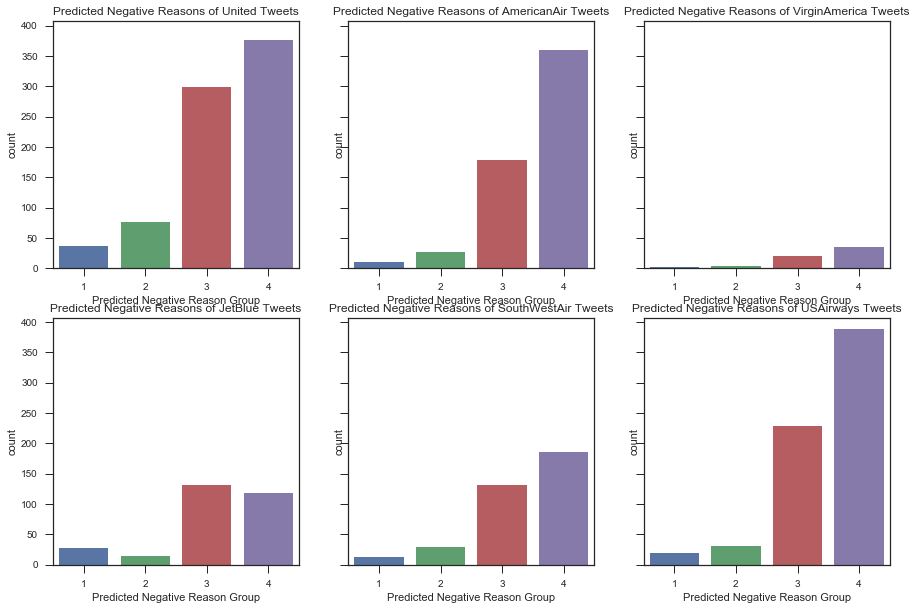

In [29]:
#BONUS
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2,3, figsize=(15,10), sharey=True)

#count number of tweets classified by negative reasons logistic regression model for united airlines
sns.countplot(x='predicted', data=results_model2.loc[results_model2['airline'] == 'united'], ax=ax1)
ax1.set_xlabel("Predicted Negative Reason Group")
ax1.title.set_text("Predicted Negative Reasons of United Tweets")

#count number of tweets classified by negative reasons logistic regression model for united airlines
sns.countplot(x='predicted', data=results_model2.loc[results_model2['airline'] == 'americanair'], ax=ax2)
ax2.set_xlabel("Predicted Negative Reason Group")
ax2.title.set_text("Predicted Negative Reasons of AmericanAir Tweets")

#count number of tweets classified by negative reasons logistic regression model for united airlines
sns.countplot(x='predicted', data=results_model2.loc[results_model2['airline'] == 'virginamerica'], ax=ax3)
ax3.set_xlabel("Predicted Negative Reason Group")
ax3.title.set_text("Predicted Negative Reasons of VirginAmerica Tweets")

#count number of tweets classified by negative reasons logistic regression model for united airlines
sns.countplot(x='predicted', data=results_model2.loc[results_model2['airline'] == 'jetblue'], ax=ax4)
ax4.set_xlabel("Predicted Negative Reason Group")
ax4.title.set_text("Predicted Negative Reasons of JetBlue Tweets")

#count number of tweets classified by negative reasons logistic regression model for united airlines
sns.countplot(x='predicted', data=results_model2.loc[results_model2['airline'] == 'southwestair'], ax=ax5)
ax5.set_xlabel("Predicted Negative Reason Group")
ax5.title.set_text("Predicted Negative Reasons of SouthWestAir Tweets")

#count number of tweets classified by negative reasons logistic regression model for united airlines
sns.countplot(x='predicted', data=results_model2.loc[results_model2['airline'] == 'usairways'], ax=ax6)
ax6.set_xlabel("Predicted Negative Reason Group")
ax6.title.set_text("Predicted Negative Reasons of USAirways Tweets")

#fig.legend(handles, labels, handler_map={tuple : TextHandler()}) 


From the figure above, we can see that for United, AmericanAir, and USAirways, most of public sentiment is negative because of group 4, which includes tweets related to customer service complaints. This is also true for the other airlines. Therefore, if they were looking to improve the pubic sentiment about them, designing initiatives to improve customer service (customer service issue, flight attendant complaints, flight booking problems) could hopefully improve their value add for customers, resulting in improved pubilc sentiment. 

Second, we will investigate how the model performed with respect to the true values. 

In [30]:
#create a classification report to analyze logistic regression performance for each negative result group
from sklearn.metrics import classification_report
target_names = ['group 0', 'group 1', 'group 2', 'group 3', 'group 4']
print(classification_report(y2_test, y2_pred, target_names=target_names))


             precision    recall  f1-score   support

    group 0       0.00      0.00      0.00        53
    group 1       0.67      0.19      0.30       373
    group 2       0.82      0.58      0.68       258
    group 3       0.74      0.79      0.76       930
    group 4       0.66      0.85      0.74      1131

avg / total       0.69      0.70      0.67      2745



/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Confusion matrix, without normalization
[[  0   1   5  21  26]
 [  0  72   5  68 228]
 [  0   5 150  28  75]
 [  0  17   8 733 172]
 [  0  13  15 140 963]]


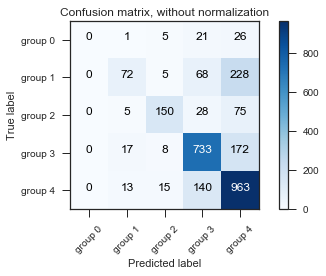

In [31]:
#BONUS: graph confusion matrix
class_names = ['group 0', 'group 1', 'group 2', 'group 3', 'group 4']
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

cnf_matrix = confusion_matrix(y2_test, y2_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

#print(confusion_matrix(y2_test,y2_pred))

**Analysis of Reasons for Negative Tweet Logistic Model Performance**

1) As is evident from the confusion matrix as well as the analysis above, the longlines category (group 0) is never predicted for any of the airlines. This could be because not enough  tweets in the test data or training data are in the longlines category, there are a total of 176 tweets that fall within that category, that is 1.5%

2) It is also evident that for certain groupings, the grouping was more precise than for others. That is for tweets predicted to be in groups 2 and 3 performed better than the other groups. This could be because the groupings for 2 and 3 were fairly specific, so the language used in each tweet occured with higher frequency in those tweets, to the tweet would have similar language.

3) The tweets predicted to be in groups 1 and 4 performed mediocrely, this could be because the groupings were not specific enough.

4) From the confusion matrix, it is evident that some tweets from a specific group were mis-predicted into other groups more than others. These include the 228 tweets predicted to be in group 4 yet were truly in group 1 and the 140 tweets predicted to be in group 3 yet were truly in group 4. For the mis-classified tweets, investigate a few examples. To do so, review the tweets to compare how they were classified to their true classification.


In [32]:
#view the results table to pick out a few examples of tweets that were properly calssified, and those that were not
results_model2

,true,predicted,row_index,text,airline,negative_reason
8984,3,4,8984,@usairways 45 minutes means public transit hom...,usairways,Late Flight
2742,2,4,2742,@united messaged requested called baggage team...,united,Lost Luggage
3490,4,4,3490,@southwestair went purchase flight began proce...,southwestair,Flight Booking Problems
8057,4,4,8057,@usairways trying week book multi city award t...,usairways,Flight Booking Problems
11539,4,4,11539,@americanair leaving 20 minutes late flight wa...,americanair,Customer Service Issue
8494,1,4,8494,@usairways gladly take loyal customers money c...,usairways,Can't Tell
5703,3,3,5703,@jetblue nope 845am flight leaving almost 5pm ...,jetblue,Late Flight
7398,4,4,7398,@usairways @americanair worst customer service...,usairways,Customer Service Issue
9750,3,3,9750,@americanair running one flight 10 mins next f...,americanair,Late Flight
10375,2,2,10375,@americanair priority baggage evidently means ...,americanair,Lost Luggage


In [33]:
'''
Select some tweets where the predicted group was group4, and the actual group was group 4. 
Then, investigate a tweet that was predicted to be group 4, but was actually group 1 
because there was 228 occurances of these mis-predictions.

'''
print("predicted to be group 4, was group 4")
print(results_model2['text'][3490])
print(results_model2['text'][11539])

print("\npredicted to be group 4, was group 1")
print(results_model2['text'][8494])

predicted to be group 4, was group 4
@southwestair went purchase flight began processing even 4 minutes earlier points gone  help
@americanair leaving 20 minutes late flight warnings communication 15 minutes late flight thats called shitty customer svc

predicted to be group 4, was group 1
@usairways gladly take loyal customers money cause inconvenience nothing help fix problem caused


The final tweet shown was classified as a group 4 tweet, yet is actually classified as a group 1, meaning it couldn't be classified. Reading the tweet, it includes the word customer, which would indicate that it should be in category 4, relating to customer experience. The word customer is even preesnt in the secnd tweet printed.

In [34]:
print("predicted to be group 3, was group 3")
print(results_model2['text'][4129])
print(results_model2['text'][7771])

print("\npredicted to be group 3, was group 4")
print(results_model2['text'][1474])


predicted to be group 3, was group 3
@southwestair flight phl fll cancelled flighted 221 flight available 224 done sw
@usairways claimed flight cancelled flighted phl runway good delta flight exact time taking time

predicted to be group 3, was group 4
@united boarding time ua3882 crewe


The  mis-identified tweet seems to have been mis-identified as a group 3 tweet because it included the word 'boarding', which is certainly related to flight operations. However, it seems to be categorized as a customer service complaint because of the slow operations of the service. 

From the examples above, it is clear that the context in which words are used has a large impact on their sentiment and meaning, so that is something that if included in the logistic regression model, may improve the classification performance of the model.

To summarize, some of the reasons identified for why tweets were incorrectly classified are that the longlines category had too few instances, and the context in which words were used was not included in the logistic regression. 

**Ways to improve the accuracy of the model:**

One way to improve the model would be to re-examine how the groups were formed.  This could be done by first grouping categories together which have similar text in their tweets, and then grouping them together. We see that this was the case for certain groups (ie 2 and 3), however was not for other groups.
Another way to improve the performance of the model would be to analyze the use of groups of words in each tweet rather than simply each word. This would attempt to capture the context of the use of each word, and would capture the intended meaning of the word.